# TechLabs final project 
## (Problem 2 - Group 8)

__This notebook should be run in jupyter notebook, maybe it will fail in Google colab__

---

This notebook represents the work in the final project of the Techlabs #codeathome course.
<br> <br>
Team members: Alejandro Echavarria, Juliana Bedoya, Luca Wulfert, Marco Stoever and Phillip Guske

---

# Data Preparation

### libraries

In [2]:
#------------- General purpose libraries -------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta


#------------- Machine learning libraries -------------

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,LassoLars
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from fbprophet import Prophet
import scipy.cluster.hierarchy as sch

#------------- Data visualization libraries -------------

import bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool, Range1d, Span, Label
from bokeh.layouts import layout

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, VBox, HBox

import warnings
warnings.filterwarnings('ignore')

output_notebook()
from bokeh.tile_providers import get_provider, Vendors

Importing plotly failed. Interactive plots will not work.


Loading BokehJS ...

### Constants

In [3]:
confirmed_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
countries_csv_url = 'https://raw.githubusercontent.com/rechavar/pyCovid_TechLabsProj/master/countries.csv'

### Data Exploration

---
GitHub repository: https://github.com/CSSEGISandData/COVID-19 
<br>
(c) Johns Hopkins University Center for Systems Science and Engineering <br> <br>
The datasets were also used by Kaggle for their weekly *COVID19 Global Forecasting* competition. <br>
(e.g. see: https://www.kaggle.com/c/covid19-global-forecasting-week-5)


---







In [4]:
df_confirmed = pd.read_csv(confirmed_csv_url)
df_death = pd.read_csv(death_csv_url)
df_recovered = pd.read_csv(recovered_csv_url)
df_countries = pd.read_csv(countries_csv_url)

In [5]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,969,981,989,998,1004,1029,1050,1076,1099,1122
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,762,763,763,763,763,764,764
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,58,60,61,69,70,70,71,74,81,84


In [6]:
df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,193,205,216,218,219,220,227,235,246,249
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,32,32,33,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,575,582,592,600,609,617,623,630,638,646
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,4,4,4,4,4,4,4,4


In [7]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,938,996,1040,1075,1097,1128,1138,1209,1259,1303
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,771,777,783,789,795,803,812,823,851,857
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,639,652,653,653,663,676,676,681,684,692
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,17,18,18,18,18,18,18,18,18


In [8]:
all_dataframes = {'confirmed': df_confirmed,
                  'death': df_death,
                  'recovered': df_recovered,
                  'countries': df_countries}

### Data Cleaning

In [9]:
for key, df in all_dataframes.items():
  print('cleaning: {}'.format(key))

  if key == 'countries':
    continue

  df.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

  #Country renaming:
  df["Country/Region"].replace(["Taiwan*", "US", "Congo (Brazzaville)", "Congo (Kinshasa)"], 
                               ["Taiwan", "USA", "Republic of the Congo", "Democratic Republic of the Congo"],
                               inplace = True)
  #Set new index
  df.set_index('Country/Region', inplace = True)

  #Grouping together countries originally split into multiple Provinces/States
  #(Australia, Canada, China, Denmark, France, Netherlands, United Kingdom)
  df = df.groupby(by = df.index, axis = 0).sum()

  # Addition of a "global" row
  df.loc['Global'] = df.sum(axis=0)

  #transpose
  df=df.T
  df.rename_axis(index='Date', columns="Country",inplace=True)
  df.index = pd.to_datetime(df.index)

  #Naming the Date index:
  df.index.rename("Date", inplace= True)

  #Creating a datetime index:
  df.index = pd.to_datetime(df.index)
  
  #Save new dataFrame
  all_dataframes[key] = df

# Change country names in df_countries
old_names = [ 'Myanmar [Burma]', 'Cape Verde',  "C?te d'Ivoire", 'Czech Republic',
             'Congo [DRC]',  'Swaziland', 'Vatican City',  'South Korea', 'Macedonia [FYROM]',
              'Congo [Republic]',  'S?o Tom? and Pr?ncipe',  'United States',  'Gaza Strip','Sudan']

new_names = ['Burma', 'Cabo Verde', "Cote d'Ivoire", 'Czechia', 'Democratic Republic of the Congo',
              'Eswatini',  'Holy See',  'Korea, South',  'North Macedonia',  'Republic of the Congo',
             'Sao Tome and Principe', 'USA',  'West Bank and Gaza','South Sudan']

all_dataframes['countries'] = all_dataframes['countries'].replace(old_names, new_names)

cleaning: confirmed
cleaning: death
cleaning: recovered
cleaning: countries


In [10]:
all_dataframes['confirmed']
#now 186 countries in total + cruise ships "Diamond Princess" & "MS Zaandam" + "Global" count

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,Global
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,555
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,654
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,941
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1434
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,2,0,0,0,0,0,2118
2020-01-27,0,0,0,0,0,0,0,0,5,0,...,0,0,0,2,0,0,0,0,0,2927
2020-01-28,0,0,0,0,0,0,0,0,5,0,...,0,0,0,2,0,0,0,0,0,5578
2020-01-29,0,0,0,0,0,0,0,0,6,0,...,0,0,0,2,0,0,0,0,0,6166
2020-01-30,0,0,0,0,0,0,0,0,9,0,...,0,0,0,2,0,0,0,0,0,8234


### New Dataframe: Active Cases

In [11]:
all_dataframes['active'] = all_dataframes['confirmed'] - all_dataframes['recovered'] - all_dataframes['death']

### Calculating Projections

In [12]:
def create_country(country):
  country_confirmed=all_dataframes["confirmed"].loc[:,[country]]
  country_confirmed["Total Cases"]=country_confirmed[country]
  country_confirmed.drop(country, inplace=True, axis=1)
  country_confirmed.rename_axis(columns=country,inplace=True)
  country_confirmed["New Cases"]=(country_confirmed["Total Cases"]-country_confirmed.shift(1)["Total Cases"])
  country_confirmed["R_7"]=(country_confirmed["Total Cases"]-country_confirmed.shift(7)["Total Cases"])/(country_confirmed.shift(4)["Total Cases"]-country_confirmed.shift(11)["Total Cases"])
  return(country_confirmed)

country_dataframes = {country: create_country(country) for country in all_dataframes["confirmed"].columns}

In [13]:

def create_projection(country):
  
  country_prediction=(pd.DataFrame(index=pd.date_range(start=country_dataframes[country].index[-1], periods=21, freq='D'), 
                                   columns=["Total Cases", "New Cases", "R_7"]))
  country_prediction.drop(country_prediction.index[0], inplace=True)
  country_prediction.rename_axis(index='Date', columns=country,inplace=True)
  country_prediction.index=pd.to_datetime(country_prediction.index)
  country_dataframes[country]["Prediction"]=False
  country_prediction["Prediction"]=True

  country_combined=pd.concat([country_dataframes[country], country_prediction])

  R_slidervalue_country=country_dataframes[country]["R_7"][-1]
  
    
  for date in country_combined.index:
    if country_combined.loc[date, 'Prediction']:
      country_combined.loc[date, 'Total Cases']=R_slidervalue_country*(country_combined.shift(4).loc[date, 'Total Cases']-country_combined.shift(5).loc[date, 'Total Cases'])+country_combined.shift(1).loc[date, 'Total Cases']
         
  country_combined['New Cases']=country_combined['Total Cases']-country_combined.shift(1)['Total Cases']
    
  for date in country_combined.index:
    try:
      country_combined.loc[date, "R_7"]=(country_combined.loc[date, "Total Cases"]-country_combined.shift(7).loc[date, "Total Cases"])/(country_combined.shift(4).loc[date, "Total Cases"]-country_combined.shift(11).loc[date, "Total Cases"])
        
    except ZeroDivisionError:
      country_combined.loc[date, 'R_7']=None
  country_combined["Total Cases"]=country_combined["Total Cases"].astype('float64')
  country_combined["New Cases"]=country_combined["New Cases"].astype('float64')
  country_combined["R_7"]=country_combined["R_7"].astype('float64')
  return (country_combined)  
projection_dataframes = {country: create_projection(country) for country in all_dataframes["confirmed"].columns}

In [14]:
def add_more_projections(country):
  projection_dataframes[country]['Death Cases']=all_dataframes['death'][country]
  projection_dataframes[country]['Recovered Cases']=all_dataframes['recovered'][country]
  projection_dataframes[country]['Active Cases']=(projection_dataframes[country]['Total Cases']
                                                    -projection_dataframes[country]['Death Cases']-projection_dataframes[country]['Recovered Cases'])
  projection_dataframes[country]['Recovered Rate']=((projection_dataframes[country]['Recovered Cases']-projection_dataframes[country]['Recovered Cases'].shift(1))/
                                                      projection_dataframes[country]['Active Cases'].shift(1))
  projection_dataframes[country]['Death Rate']=((projection_dataframes[country]['Death Cases']-projection_dataframes[country]['Death Cases'].shift(1))/
                                                  projection_dataframes[country]['New Cases'].shift(21))

  Recovered_Rate=projection_dataframes[country]['Recovered Rate'].loc[projection_dataframes[country]['Prediction']==False].iloc[-8:].mean()
  Death_Rate=projection_dataframes[country]['Death Rate'].loc[projection_dataframes[country]['Prediction']==False].iloc[-8:].mean()

  for date in projection_dataframes[country].index:
      if projection_dataframes[country].loc[date, 'Prediction']:
        projection_dataframes[country].loc[date, 'Recovered Cases']=(Recovered_Rate*projection_dataframes[country].shift(1).loc[date, 'Active Cases']
                                                                       +projection_dataframes[country].shift(1).loc[date, 'Recovered Cases'])
        projection_dataframes[country].loc[date, 'Death Cases']=(Death_Rate*projection_dataframes[country].shift(21).loc[date, 'New Cases']
                                                                   +projection_dataframes[country].shift(1).loc[date, 'Death Cases'])
        projection_dataframes[country].loc[date, 'Active Cases']=(projection_dataframes[country].loc[date, 'Total Cases']
                                                                    -projection_dataframes[country].loc[date, 'Recovered Cases']
                                                                    -projection_dataframes[country].loc[date, 'Death Cases'])
      
  projection_dataframes[country]['Recovered Rate']=((projection_dataframes[country]['Recovered Cases']-projection_dataframes[country]['Recovered Cases'].shift(1))/
                                                      projection_dataframes[country]['Active Cases'].shift(1))
  projection_dataframes[country]['Death Rate']=((projection_dataframes[country]['Death Cases']-projection_dataframes[country]['Death Cases'].shift(1))/
                                                  projection_dataframes[country]['New Cases'].shift(21))  
                                                                 
for country in all_dataframes["confirmed"].columns:
  add_more_projections(country)

### Machine Learning Approach

In [15]:
countrywise = pd.DataFrame()
countrywise['Country'] = all_dataframes['confirmed'].columns
countrywise = countrywise.set_index('Country')
countrywise['Confirmed'] = all_dataframes['confirmed'].iloc[-1,:]
countrywise['Death'] = all_dataframes['death'].iloc[-1,:]
countrywise['Recovered'] = all_dataframes['recovered'].iloc[-1,:]
countrywise['Active'] = all_dataframes['active'].iloc[-1,:]
countrywise.head()

,Confirmed,Death,Recovered,Active
Country,,,,
Afghanistan,14525,249,1303,12973
Albania,1122,33,857,232
Algeria,9267,646,5549,3072
Andorra,764,51,692,21
Angola,84,4,18,62


In [16]:
countrywise['Mortality'] = (countrywise['Death']/countrywise['Confirmed'])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100
countrywise['Survival porbability'] = 100 - countrywise['Mortality']

In [17]:
datewise = pd.DataFrame()
datewise['Date'] = all_dataframes['active'].index
datewise['Recovered'] = all_dataframes['recovered']['Global'].values
datewise['Confirmed'] = all_dataframes['confirmed']['Global'].values
datewise['Death'] = all_dataframes['death']['Global'].values
datewise['Active'] = all_dataframes['active']['Global'].values
datewise['Closed'] = datewise['Recovered'] + datewise['Death']
datewise = datewise.set_index('Date')

In [18]:
datewise['Mortality'] = datewise['Death']/datewise['Confirmed']*100
datewise['Recovery'] = datewise['Recovered']/datewise['Confirmed']*100
datewise

,Recovered,Confirmed,Death,Active,Closed,Mortality,Recovery
Date,,,,,,,
2020-01-22,28,555,17,510,45,3.063063,5.045045
2020-01-23,30,654,18,606,48,2.752294,4.587156
2020-01-24,36,941,26,879,62,2.763018,3.825717
2020-01-25,39,1434,42,1353,81,2.928870,2.719665
2020-01-26,52,2118,56,2010,108,2.644004,2.455146
2020-01-27,61,2927,82,2784,143,2.801503,2.084045
2020-01-28,107,5578,131,5340,238,2.348512,1.918250
2020-01-29,126,6166,133,5907,259,2.156990,2.043464
2020-01-30,143,8234,171,7920,314,2.076755,1.736701


In [19]:
datewise['Days since'] = datewise.index-datewise.index[0]
datewise['Days since'] = datewise["Days since"].dt.days
datewise

,Recovered,Confirmed,Death,Active,Closed,Mortality,Recovery,Days since
Date,,,,,,,,
2020-01-22,28,555,17,510,45,3.063063,5.045045,0
2020-01-23,30,654,18,606,48,2.752294,4.587156,1
2020-01-24,36,941,26,879,62,2.763018,3.825717,2
2020-01-25,39,1434,42,1353,81,2.928870,2.719665,3
2020-01-26,52,2118,56,2010,108,2.644004,2.455146,4
2020-01-27,61,2927,82,2784,143,2.801503,2.084045,5
2020-01-28,107,5578,131,5340,238,2.348512,1.918250,6
2020-01-29,126,6166,133,5907,259,2.156990,2.043464,7
2020-01-30,143,8234,171,7920,314,2.076755,1.736701,8


#### Predictions using ML models

__Exploring some machine learning models__

In [0]:
train = datewise.iloc[:int(datewise.shape[0] * 0.90)]
val = datewise.iloc[int(datewise.shape[0] * 0.90):]

In [0]:
def plot_model(X, y, y_hat, title):

  plt.figure(figsize=(8,4))
  plt.plot(X, y, color = 'b', label = 'Confirmed cases')
  plt.plot(X, y_hat, color = 'r', label = 'Confirmed predicted cases')
  plt.legend(loc = 'best')
  plt.grid()
  plt.title(title)
  plt.show()

Linear Model

In [ ]:
lin_reg = LinearRegression(normalize= True)
lin_reg.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))
predictions = lin_reg.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_lin = np.sqrt(mean_squared_error(val['Confirmed'],predictions))
print('Error : ', rmse_lin)

In [ ]:
y_hat_lin = lin_reg.predict(np.asarray(datewise['Days since']).reshape(-1,1))
plot_model(datewise.index, datewise['Confirmed'], y_hat_lin, 'Confirmed')

Polynomial regression

In [0]:
poly = PolynomialFeatures(degree = 10)
xtrain_poly = poly.fit_transform(np.asarray(train['Days since']).reshape(-1,1))
xvalid_poly = poly.fit_transform(np.asarray(val['Days since']).reshape(-1,1))
polyRegression = LinearRegression(normalize=True)
polyRegression.fit(xtrain_poly, train['Confirmed'])
predictions = polyRegression.predict(xvalid_poly)
rmse_poly = np.sqrt(mean_squared_error(val['Confirmed'],predictions))
print('Error: ', rmse_poly)
x_poly = poly.fit_transform(np.asarray(datewise['Days since']).reshape(-1,1))
y_hat_poly = polyRegression.predict(x_poly)

Error:  260303.41032079305


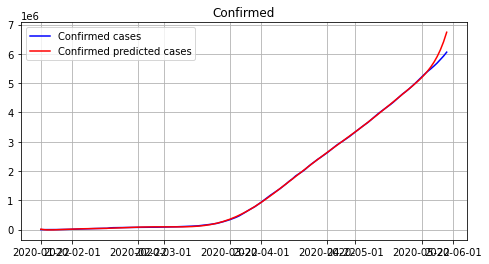

In [0]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_poly,'Confirmed')

Lasso model

In [ ]:
lassoReg = LassoLars(alpha= 0.1)

In [ ]:
lassoReg.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))

In [ ]:
predictions = lassoReg.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_lasso = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_lasso)

In [ ]:
y_hat_lasso = lassoReg.predict(np.asarray(datewise['Days since']).reshape(-1,1))

In [ ]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_lasso,'Confirmed')

Support vector machine

Error:  847374.6101863071


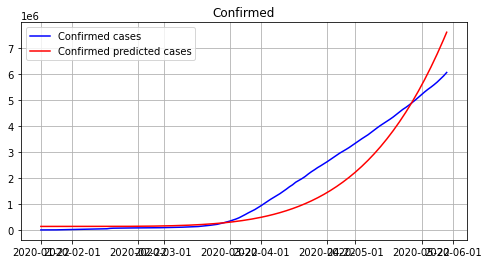

In [0]:
svm = SVR(C=1, degree=5, kernel='poly', epsilon = 0.001)
svm.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))
predictions = svm.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_svm = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_svm)
y_hat_svm = svm.predict(np.asarray(datewise['Days since']).reshape(-1,1))
plot_model(datewise.index, datewise['Confirmed'], y_hat_svm,'Confirmed')

Ensemble method : Random forest

In [ ]:
forestReg =  RandomForestRegressor( random_state=0)

In [ ]:
forestReg.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))

In [ ]:
predictions = forestReg.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_forest = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_forest)

In [ ]:
y_hat_forest = forestReg.predict(np.asarray(datewise['Days since']).reshape(-1,1))

In [ ]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_forest,'Confirmed')

Ensemble method : Ada Boost 

Error:  895281.5029518193


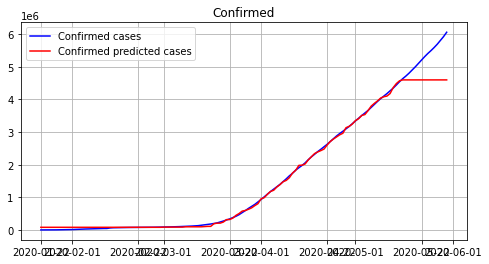

In [0]:
adam = AdaBoostRegressor(learning_rate=1, loss= 'square', random_state=0)
adam.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))
predictions = adam.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_adam = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_adam)
y_hat_adam = adam.predict(np.asarray(datewise['Days since']).reshape(-1,1))
plot_model(datewise.index, datewise['Confirmed'], y_hat_adam, 'Confirmed')

Neuronal Network

In [ ]:
nn_reg = MLPRegressor(max_iter=1000,learning_rate='invscaling',
             learning_rate_init=10)

In [ ]:
nn_reg.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train['Confirmed']).reshape(-1,1))

In [ ]:
predictions = nn_reg.predict(np.asarray(val['Days since']).reshape(-1,1))
rmse_nn = np.sqrt(mean_squared_error(val['Confirmed'], predictions))
print('Error: ', rmse_nn)

In [ ]:
y_hat_nn = adam.predict(np.asarray(datewise['Days since']).reshape(-1,1))

In [ ]:
plot_model(datewise.index, datewise['Confirmed'], y_hat_nn, 'Confirmed')

Facebook's prophet

In [0]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y'])

In [0]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

confirmed_forecast=prophet_c.predict(forecast_c)

In [0]:
print(confirmed_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])

            ds          yhat    yhat_lower    yhat_upper
0   2020-01-22 -1.215518e+04 -4.377608e+04  1.998447e+04
1   2020-01-23 -5.441238e+03 -3.746967e+04  2.614687e+04
2   2020-01-24  2.469201e+03 -2.851534e+04  3.509771e+04
3   2020-01-25  7.434877e+03 -2.496291e+04  3.747836e+04
4   2020-01-26  3.070153e+03 -2.992274e+04  3.494926e+04
..         ...           ...           ...           ...
142 2020-06-12  7.172890e+06  7.012817e+06  7.347232e+06
143 2020-06-13  7.268325e+06  7.091282e+06  7.447360e+06
144 2020-06-14  7.354430e+06  7.159285e+06  7.561550e+06
145 2020-06-15  7.443351e+06  7.224609e+06  7.664556e+06
146 2020-06-16  7.533784e+06  7.301720e+06  7.785514e+06

[147 rows x 4 columns]


Figure(720x432)


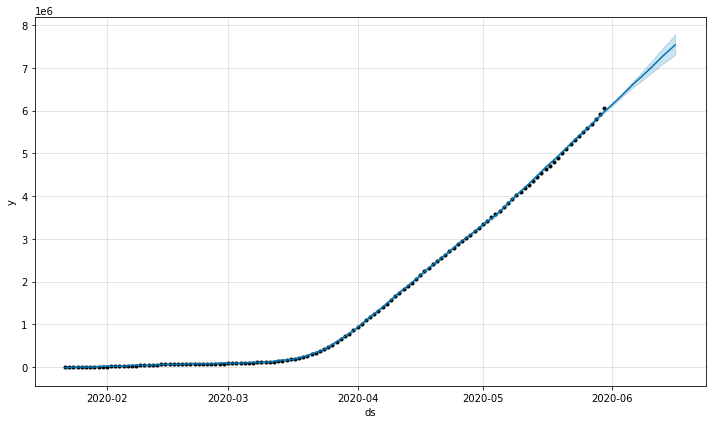

In [0]:
print(prophet_c.plot(confirmed_forecast))

In [0]:
prophet_rmse = np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0])))

In [0]:
print('Error: ', prophet_rmse)

Error:  15711.133274735053


__We chose 4 models to apply to each country and each case type.  <br> Those models are: Facebook's prophet, Polynomial regression, Ada boost and Support vector machine__

In [20]:
def apply_fb_prophet(database, case, plot = True):
  prophet=Prophet(interval_width=0.95,weekly_seasonality=True)
  prophet_=pd.DataFrame(zip(list(database.index),list(database[case])),columns=['ds','y'])

  prophet.fit(prophet_)

  forecast=prophet.make_future_dataframe(periods=17)
  forecast_confirmed=forecast.copy()
  confirmed_forecast=prophet.predict(forecast)
  if plot:
    print(prophet.plot(confirmed_forecast))

  return prophet                 

In [21]:
def apply_poly(database, case, plot = True):
  train = database.iloc[:int(database.shape[0] * 0.95)]
  val = database.iloc[int(database.shape[0] * 0.95):]

  poly = PolynomialFeatures(degree = 8) 

  xtrain_poly = poly.fit_transform(np.asarray(train['Days since']).reshape(-1,1))
  xvalid_poly = poly.fit_transform(np.asarray(val['Days since']).reshape(-1,1))

  polyRegression = LinearRegression(normalize=True)
  polyRegression.fit(xtrain_poly, train[case])

  predictions = polyRegression.predict(xvalid_poly)
  rmse_poly = np.sqrt(mean_squared_error(val[case],predictions))
  print('Error: ', rmse_poly)

  x_poly = poly.fit_transform(np.asarray(datewise['Days since']).reshape(-1,1))
  y_hat_poly = polyRegression.predict(x_poly) 
  if plot:
    plot_model(database.index, database[case], y_hat_poly, case)

  return polyRegression, poly 

In [22]:
def apply_svm(database, case, plot = True):
  train = database.iloc[:int(database.shape[0] * 0.95)]
  val = database.iloc[int(database.shape[0] * 0.95):]

  svm = SVR(C=1, degree=5, kernel='poly', epsilon = 0.001)
  svm.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train[case]).reshape(-1,1))
  
  predictions = svm.predict(np.asarray(val['Days since']).reshape(-1,1))
  rmse_svm = np.sqrt(mean_squared_error(val[case], predictions))
  print('Error: ', rmse_svm)

  y_hat_svm = svm.predict(np.asarray(datewise['Days since']).reshape(-1,1))
  if plot:
    plot_model(datewise.index, datewise[case], y_hat_svm, case)
  return svm

In [23]:
def apply_ada(database, case, plot = True):
  train = database.iloc[:int(database.shape[0] * 0.95)]
  val = database.iloc[int(database.shape[0] * 0.95):]  

  ada = AdaBoostRegressor(learning_rate=1, loss= 'square', random_state=0)
  ada.fit(np.asarray(train['Days since']).reshape(-1,1), np.asarray(train[case]).reshape(-1,1))
  predictions = ada.predict(np.asarray(val['Days since']).reshape(-1,1))
  rmse_adam = np.sqrt(mean_squared_error(val[case], predictions))
  print('Error: ', rmse_adam)
  y_hat_adam = ada.predict(np.asarray(datewise['Days since']).reshape(-1,1))
  if plot:
    plot_model(datewise.index, datewise[case], y_hat_adam, case)
  return ada

Applying each model to death and recovered cases

FACEBOOK PROPHET

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Figure(720x432)


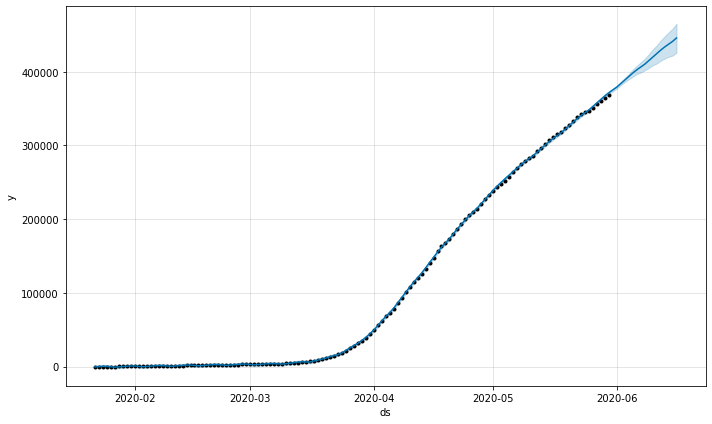

In [0]:
fb_death = apply_fb_prophet(datewise, 'Death')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Figure(720x432)


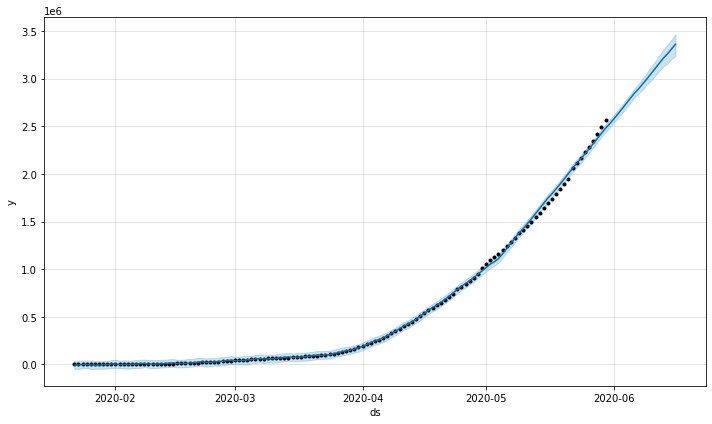

In [0]:
fb_recovered = apply_fb_prophet(datewise, 'Recovered')

POLYNOMIAL REGRESSOR

Error:  2606.5310102456583


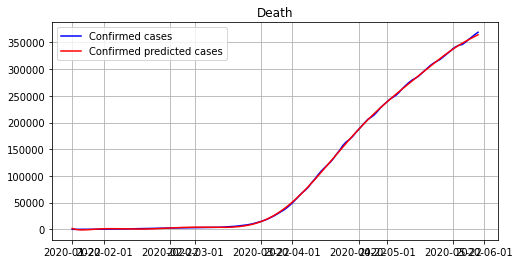

In [0]:
poly_death = apply_poly(datewise, 'Death')

Error:  282015.2076768943


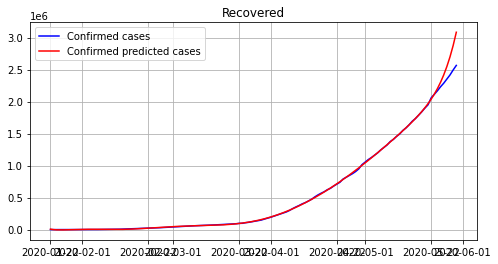

In [0]:
poly_recovered = apply_poly(datewise, 'Recovered')

SVM

Error:  197278.7164830078


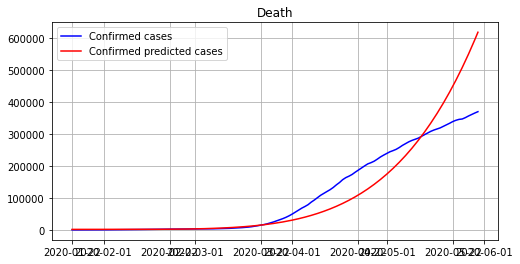

In [0]:
svm_death = apply_svm(datewise, 'Death')

Error:  228168.10299140585


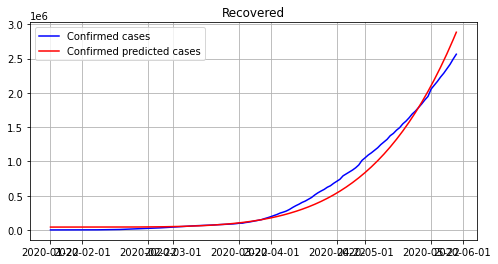

In [0]:
svm_recovered = apply_svm(datewise,'Recovered')

Ada boost

Error:  22143.33378058435


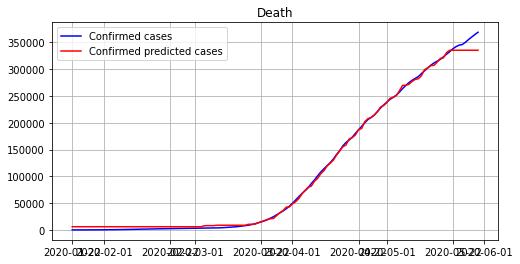

In [0]:
ada_death = apply_ada(datewise,'Death')

Error:  331236.3182093593


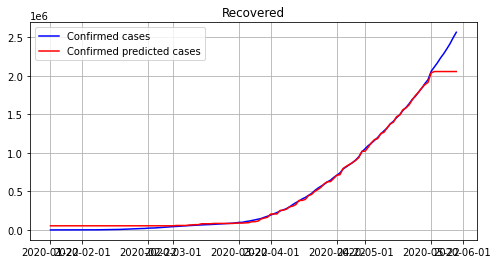

In [0]:
ada_recovered = apply_ada(datewise,'Recovered')

In [24]:
def make_datewise(country):
  datewise = pd.DataFrame()
  datewise['Date'] = all_dataframes['active'].index
  datewise['Recovered'] = all_dataframes['recovered'][country].values
  datewise['Confirmed'] = all_dataframes['confirmed'][country].values
  datewise['Death'] = all_dataframes['death'][country].values
  datewise['Active'] = all_dataframes['active'][country].values
  datewise['Closed'] = datewise['Recovered'] + datewise['Death']
  datewise = datewise.set_index('Date')
  datewise['Days since'] = datewise.index-datewise.index[0]
  datewise['Days since'] = datewise["Days since"].dt.days
  return datewise

In [25]:
all_datewise = {}
for country in countrywise.index:
  print('country: ', country)
  all_datewise[country] = make_datewise(country)

country:  Afghanistan
country:  Albania
country:  Algeria
country:  Andorra
country:  Angola
country:  Antigua and Barbuda
country:  Argentina
country:  Armenia
country:  Australia
country:  Austria
country:  Azerbaijan
country:  Bahamas
country:  Bahrain
country:  Bangladesh
country:  Barbados
country:  Belarus
country:  Belgium
country:  Belize
country:  Benin
country:  Bhutan
country:  Bolivia
country:  Bosnia and Herzegovina
country:  Botswana
country:  Brazil
country:  Brunei
country:  Bulgaria
country:  Burkina Faso
country:  Burma
country:  Burundi
country:  Cabo Verde
country:  Cambodia
country:  Cameroon
country:  Canada
country:  Central African Republic
country:  Chad
country:  Chile
country:  China
country:  Colombia
country:  Comoros
country:  Costa Rica
country:  Cote d'Ivoire
country:  Croatia
country:  Cuba
country:  Cyprus
country:  Czechia
country:  Democratic Republic of the Congo
country:  Denmark
country:  Diamond Princess
country:  Djibouti
country:  Dominica
coun

In [26]:
def get_prediction(country: str, case: str, model : str, dataframe_dict, days = 21):
    print('Calculating {} cases for {} using the model {}'.format(case, country, model))
    df = dataframe_dict[country]
    if model == 'poly':
        modelo, featuresTransform = apply_poly(df,case, plot = False)
    if model == 'svm':
        modelo = apply_svm(df,case, plot = False)
    if model == 'facebook':
        modelo = apply_fb_prophet(df,case, plot = False)
    if model == 'ada':
        modelo = apply_ada(df,case, plot = False)

    if model == 'facebook':
      forecast=modelo.make_future_dataframe(periods = days)
      forecast_confirmed=forecast.copy()
      y_hat = modelo.predict(forecast)
      y_hat = y_hat.iloc[-15:,-1]

    elif model == 'poly':
      x_hat_list = range(df['Days since'].max() ,df['Days since'].max() + days)
      x_hat = featuresTransform.fit_transform(np.asarray(x_hat_list).reshape(-1,1))
      y_hat = modelo.predict(x_hat)
      
    else:
      x_hat_list = range(df['Days since'].max() ,df['Days since'].max() + days)    
      x_hat = np.asarray(x_hat_list).reshape(-1,1)
      print(x_hat)
      y_hat = modelo.predict(x_hat)


    return y_hat

In [27]:
prediction = get_prediction('Germany', 'Confirmed', 'facebook', all_datewise)
prediction

Calculating Confirmed cases for Germany using the model facebook


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


136    188813.842147
137    189222.110403
138    189629.190946
139    190100.604530
140    190903.682925
141    191751.441634
142    192775.817626
143    193250.146677
144    193658.414933
145    194065.495477
146    194536.909061
147    195339.987455
148    196187.746165
149    197212.122156
150    197686.451208
Name: yhat, dtype: float64

# Interactive Data Visualization <br> (Chapters 1 and 2)

## Chapter 1: World Map


In [28]:
#rename df_countries columns for merge
all_dataframes['countries'].rename(columns= {'country': 'shortcut', 'name': 'Country'}, inplace = True)
all_dataframes['countries'].head()

,shortcut,latitude,longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [29]:
# create slider
dates = list(pd.date_range(all_dataframes["confirmed"].index.min(), all_dataframes["confirmed"].index.max(), freq='D'))
options = [(i.strftime('%Y-%m-%d'), i) for i in dates]
index = len(dates)-1
date_slider = widgets.SelectionSlider(
    options = options,
    index = index,
    description = 'Choose the Date:',
    orientation = 'horizontal',
    layout={'width': '900px'}, 
    style = {'description_width': 'initial'}
)
   

def show_world_map(date_shown, Casetype = ["Active", "Death", "Confirmed", "Recovered"]):

    all_dataframes['map'] = pd.DataFrame()
    all_dataframes['map']['Active'] = all_dataframes['active'].loc[date_shown,:]
    all_dataframes['map']['Death'] = all_dataframes['death'].loc[date_shown,:]
    all_dataframes['map']['Confirmed'] = all_dataframes['confirmed'].loc[date_shown,:]
    all_dataframes['map']['Recovered'] = all_dataframes['recovered'].loc[date_shown,:]
    all_dataframes['map'] = pd.merge(all_dataframes['map'],all_dataframes['countries'],on='Country')

    #Circles sizes for each country:
    all_dataframes['map']['sizeOfCircles'] = all_dataframes['map'][Casetype]/all_dataframes['map'][Casetype].max()*200
    all_dataframes['map'].loc[all_dataframes['map']['sizeOfCircles'] < 6, 'sizeOfCircles'] = 6

    #get the coordinates from https://carto.com/
    tile_provider = get_provider(Vendors.CARTODBPOSITRON)

    p = figure(plot_width=900, plot_height=425, title="Interactive Covid-19 World Map",
               x_range=(-2000000, 6000000),
               y_range=(-1000000, 7000000),
               x_axis_type="mercator",
               y_axis_type="mercator",
               x_axis_label='Longitude',
               y_axis_label='Latitude')
    p.title.text_font_size = "35px"
    p.title.align = "center"
    p.add_tile(tile_provider)

    #Transform LON/LAT coordinates in web mercator format'
    #function to transform
    def wgs84_to_web_mercator(df, lon="LON", lat="LAT"):

          k = 6378137
          df["x"] = df[lon] * (k * np.pi/180.0)
          df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k

          return df

    #rename columns for the function
    all_dataframes['map'].rename(columns={"longitude": "LON", "latitude": "LAT"}, inplace=True)

    #use the function 
    wgs84_to_web_mercator(all_dataframes['map'])

    #make it interactive

    all_dataframes['map'].drop(columns=['LAT', 'LON'])

    #convert the dataframe into a ColumnDataSource so that bokeh can work with it
    psource = ColumnDataSource(all_dataframes['map'])
    
    if Casetype == "Active":
        linecolor = "blue"
        fillcolor = "blue"
        
    if Casetype == "Confirmed":
        linecolor = "black" 
        fillcolor = "black"
        
    if Casetype == "Recovered":
        linecolor = "green"   
        fillcolor = "green"

    if Casetype == "Death":
        linecolor = "red" 
        fillcolor = "red"
        
    p.circle('x', 'y', source=psource, size='sizeOfCircles',
             line_color=linecolor, 
             fill_color=fillcolor,
             fill_alpha=0.05,
             legend_label="Relative Amount of Cases on that Day ")

    #create hover tool
    my_hover = HoverTool()
    
    if Casetype == "Active":
        my_hover.tooltips = [('Name of the Country', '@Country'),
                             ('No. of Active Cases', '@Active{0,0}')]
    if Casetype == "Confirmed":
        my_hover.tooltips = [('Name of the Country', '@Country'),
                             ('No. of Confirmed Cases', '@Confirmed{0,0}')]
    if Casetype == "Recovered":
        my_hover.tooltips = [('Name of the Country', '@Country'),
                             ('No. of Recovered Cases', '@Recovered{0,0}')]
    if Casetype == "Death":
        my_hover.tooltips = [('Name of the Country', '@Country'),
                             ('No. of Death Cases', '@Death{0,0}')]
    p.add_tools(my_hover)


    show(p)
    
interact_manual(show_world_map, date_shown = date_slider);

interactive(children=(SelectionSlider(description='Choose the Date:', index=129, layout=Layout(width='900px'),…

## Chapter 2: Interactive Bokeh Plot

In [30]:
# line plot - multiple lines

############################################################################
#Widgets:

#Dropdown Widget:
drop_down = widgets.Dropdown(options=all_dataframes['confirmed'].columns,
                                value="Germany",
                                description='Country:',
                                disabled=False)

checkbox_confirmed = widgets.Checkbox(
    value=True,
    description='Show Confirmed Cases',
    disabled=False,
    indent=False
)
checkbox_active = widgets.Checkbox(
    value=False,
    description='Show Active Cases',
    disabled=False,
    indent=False
)

checkbox_recovered = widgets.Checkbox(
    value=False,
    description='Show Recovered Cases',
    disabled=False,
    indent=False
)

checkbox_death = widgets.Checkbox(
    value=False,
    description='Show Death Cases',
    disabled=False,
    indent=False
)

checkbox_repr_projection = widgets.Checkbox(
    value=True,
    description='Show Reproduction Rate Projection',
    disabled=True,
    indent=False
)

checkbox_prophet = widgets.Checkbox(
    value=False,
    description='Show Facebook Prophet Projection',
    disabled=True,
    indent=False
)

checkbox_poly_regr = widgets.Checkbox(
    value=False,
    description='Show Polynomial Regression Projection',
    disabled=True,
    indent=False
)

checkbox_svm = widgets.Checkbox(
    value=False,
    description='Show Support Vector Machine Projection',
    disabled=True,
    indent=False
)

checkbox_ada_regr = widgets.Checkbox(
    value=False,
    description='Show AdaBoost Projection',
    disabled=True,
    indent=False, visibility='hidden'
)

startdatepicker = widgets.DatePicker(
    description='Pick a Startdate:',
    disabled=False,
    style = {'description_width': 'initial'},
    value = all_dataframes["confirmed"].index[0]
)

enddatepicker = widgets.DatePicker(
    description='Pick an Enddate:',
    disabled=False,
    style = {'description_width': 'initial'},
    value = projection_dataframes["Germany"].index[-1]
)

toggle_projections = widgets.ToggleButton(
    value=False,
    description='Show Projections',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Do you want to include projections in the plot?',
    icon='check' # (FontAwesome names without the `fa-` prefix) #check
)

############################################################################

############################################################################
#plotting function
def plot_country(country, startdate, enddate, 
                 confirmed, active, recovered, death,
                 #projection_confirmed = True
                 include_projection,
                 reproduction_projection, prophet_projection, poly_projection, svm_projection, adaboost_projection):

  #plot setup: 
  multi_line_plot = figure(plot_width=900, plot_height=425, title='Covid-19 Cases in {}'.format(country), 
                           x_axis_label='Date', y_axis_label='No. of Cases in {}'.format(country),
                           x_axis_type='datetime', y_axis_type = "linear")
  multi_line_plot.title.text_font_size = "35px"
  multi_line_plot.title.align = "center"

  multi_line_plot.left[0].formatter.use_scientific = False
    
  #data lines:
  if confirmed == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['confirmed'],
                       color='black', line_width=2, line_dash = "dashed", legend = "Confirmed Cases")
  if active == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['active'],
                       color='blue', line_width=2, legend = "Active Cases")
  if recovered == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['recovered'],
                       color='green', line_width=2, legend = "Recovered Cases")
  if death == True:
      multi_line_plot.line(x = "Date", y=country, source = all_dataframes['death'],
                       color='red', line_width=2, legend = "Death Cases")
        
  #projection lines:
  if include_projection == True:
    checkbox_repr_projection.disabled = False
    checkbox_prophet.disabled = False
    checkbox_poly_regr.disabled = False
    checkbox_svm.disabled = False
    checkbox_ada_regr.disabled = False
    
    if confirmed == True:
        if reproduction_projection == True:
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True]["Total Cases"], 
                                 legend="Predicted Confirmed Cases", line_dash = "dotted",  color='black', line_width=2)
            
        if prophet_projection == True:
            prediction = get_prediction(country, 'Confirmed', 'facebook', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Confirmed Cases", line_dash = "dotted",  color='black', line_width=2)
            
        if poly_projection == True:
            prediction = get_prediction(country, 'Confirmed', 'poly', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Confirmed Cases", line_dash = "dotted",  color='black', line_width=2)
        if svm_projection == True:
            prediction = get_prediction(country, 'Confirmed', 'svm', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Confirmed Cases", line_dash = "dotted",  color='black', line_width=2)
        if adaboost_projection == True:
            prediction = get_prediction(country, 'Confirmed', 'ada', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Confirmed Cases", line_dash = "dotted",  color='black', line_width=2)
            
        
    if active == True:
        if reproduction_projection == True:
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True]["Active Cases"], 
                                 legend="Predicted Active Cases", line_dash = "dotted",  color='blue', line_width=2)
        if prophet_projection == True:
            prediction = get_prediction(country, 'Active', 'facebook', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Active Cases", line_dash = "dotted",  color='blue', line_width=2)
        if poly_projection == True:
            prediction = get_prediction(country, 'Active', 'poly', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Active Cases", line_dash = "dotted",  color='blue', line_width=2)  
        if svm_projection == True:
            prediction = get_prediction(country, 'Active', 'svm', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Active Cases", line_dash = "dotted",  color='blue', line_width=2)
        if adaboost_projection == True:
            prediction = get_prediction(country, 'Active', 'ada', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Active Cases", line_dash = "dotted",  color='blue', line_width=2)            
            
            
    if recovered == True:
        if reproduction_projection == True:
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True]["Recovered Cases"], 
                                 legend="Predicted Recovered Cases", line_dash = "dotted",  color='green', line_width=2)
        if prophet_projection == True:
            prediction = get_prediction(country, 'Recovered', 'facebook', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Recovered Cases", line_dash = "dotted",  color='green', line_width=2)
        if poly_projection == True:
            prediction = get_prediction(country, 'Recovered', 'poly', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Recovered Cases", line_dash = "dotted",  color='green', line_width=2)
        if svm_projection == True:
            prediction = get_prediction(country, 'Recovered', 'svm', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Recovered Cases", line_dash = "dotted",  color='green', line_width=2) 
        if adaboost_projection == True:
            prediction = get_prediction(country, 'Recovered', 'ada', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Recovered Cases", line_dash = "dotted",  color='green', line_width=2)
            
            
    if death == True:
        if reproduction_projection == True:
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True]["Death Cases"], 
                                 legend="Predicted Death Cases", line_dash = "dotted",  color='red', line_width=2)
        if prophet_projection == True:
            prediction = get_prediction(country, 'Death', 'facebook', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Death Cases", line_dash = "dotted",  color='red', line_width=2)
        if poly_projection == True:
            prediction = get_prediction(country, 'Death', 'poly', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Death Cases", line_dash = "dotted",  color='red', line_width=2)
        if svm_projection == True:
            prediction = get_prediction(country, 'Death', 'svm', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Death Cases", line_dash = "dotted",  color='red', line_width=2)
        if adaboost_projection == True:
            prediction = get_prediction(country, 'Death', 'ada', all_datewise)
            multi_line_plot.line(projection_dataframes[country]
                                 .loc[projection_dataframes[country]['Prediction']==True].index,
                                 prediction, 
                                 legend="Predicted Death Cases", line_dash = "dotted",  color='red', line_width=2)
            
            
            
  #disable projection checkboxes when include_projection is unchecked:          
  if include_projection == False:
    checkbox_repr_projection.disabled = True
    checkbox_prophet.disabled = True
    checkbox_poly_regr.disabled = True
    checkbox_svm.disabled = True
    checkbox_ada_regr.disabled = True 
    
  multi_line_plot.x_range = Range1d(startdate, enddate)
  
  #add vertical line  
  projection_beginning = all_dataframes['confirmed'].index.max()
  beginning_of_projection = Span(location=projection_beginning,
                            dimension='height', line_color='orange',
                            line_dash='dashed', line_width=1, 
                            name = "Beginning of Projection") 
  multi_line_plot.add_layout(beginning_of_projection)

    
  # add hover tool
  hover = HoverTool()
  hover.tooltips = [('Date','@Date{%F}'),('No. of Cases','@{}'.format(country))]
  hover.formatters = {'Date': 'datetime'} 
  multi_line_plot.add_tools(hover)

  #format legend
  multi_line_plot.legend.location = "top_left"
  multi_line_plot.legend.orientation = "vertical"
  multi_line_plot.legend.background_fill_alpha = 0.35

  show(multi_line_plot)
############################################################################

############################################################################
#Interact function:
interact(plot_country, country = drop_down, startdate = startdatepicker, enddate = enddatepicker,
         confirmed = checkbox_confirmed, active = checkbox_active, 
         recovered = checkbox_recovered, death = checkbox_death,
         include_projection = toggle_projections,
         reproduction_projection = checkbox_repr_projection, prophet_projection = checkbox_prophet,
         poly_projection = checkbox_poly_regr, svm_projection = checkbox_svm, 
         adaboost_projection = checkbox_ada_regr);
############################################################################

#The Hover Tool does not work yet for the predictions

interactive(children=(Dropdown(description='Country:', index=65, options=('Afghanistan', 'Albania', 'Algeria',…

# Chapter 3: Clustering

## Clusters based on the reproduction rate

In [31]:
country_dataframes['Afghanistan']

Afghanistan,Total Cases,New Cases,R_7,Prediction
Date,,,,
2020-01-22,0,NaN,NaN,False
2020-01-23,0,0.0,NaN,False
2020-01-24,0,0.0,NaN,False
2020-01-25,0,0.0,NaN,False
2020-01-26,0,0.0,NaN,False
2020-01-27,0,0.0,NaN,False
2020-01-28,0,0.0,NaN,False
2020-01-29,0,0.0,NaN,False
2020-01-30,0,0.0,NaN,False


In [32]:
r_7 = []
for key in country_dataframes.keys():
  r_7.append(country_dataframes[key].iloc[-1,-2])

In [33]:
r_7

[1.0835327908089996,
 1.6625,
 0.8742424242424243,
 1.0,
 1.2777777777777777,
 nan,
 1.1000226295541977,
 1.1118170266836087,
 1.164179104477612,
 0.8432203389830508,
 1.4282485875706215,
 0.5,
 1.0856052344601963,
 1.0773860705073086,
 0.0,
 0.979087162265303,
 0.8269230769230769,
 nan,
 1.141025641025641,
 1.5,
 1.3849340866290019,
 1.0842105263157895,
 0.5,
 1.2656761943068788,
 nan,
 0.4945652173913043,
 0.9166666666666666,
 1.7692307692307692,
 inf,
 0.9090909090909091,
 0.5,
 0.7886733088620871,
 0.8595498222982756,
 1.3442622950819672,
 0.7161290322580646,
 1.0381579874568387,
 1.1,
 1.0805866842452208,
 0.3684210526315789,
 1.7432432432432432,
 1.3364197530864197,
 0.25,
 1.236842105263158,
 0.8095238095238095,
 0.8436724565756824,
 1.2157622739018088,
 0.8987012987012987,
 nan,
 1.0870588235294119,
 nan,
 1.2180303772660461,
 0.7219101123595506,
 1.315629742033384,
 1.0588235294117647,
 1.5871559633027523,
 nan,
 1.0232558139534884,
 0.8490566037735849,
 1.693452380952381,
 na

In [34]:
countrywise['R_7'] = r_7

In [35]:
x_7 = countrywise[['R_7','Mortality']][countrywise['Confirmed']>1000]
std = StandardScaler()
x_7 = std.fit_transform(x_7)

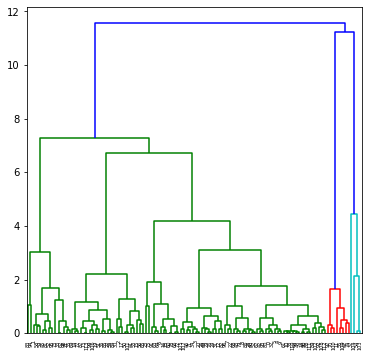

In [36]:
plt.figure(figsize=(6,6))
dendogram=sch.dendrogram(sch.linkage(x_7, method  = "ward"))

In [37]:
clusters = KMeans(n_clusters=3, random_state=6)
clusters.fit(x_7)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [38]:
r_7_cluster = []
for idx in countrywise.index:
  if countrywise.loc[idx]['Confirmed'] > 1000:
    r_7_cluster.append(clusters.predict(np.asarray(countrywise.loc[idx][['Mortality', 'R_7']]).reshape(1,-1)))
  else:
    r_7_cluster.append(4)
countrywise['R_7 Clusters'] = np.asarray(r_7_cluster, dtype= np.int64)
countrywise

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival porbability,R_7,R_7 Clusters
Country,,,,,,,,,
Afghanistan,14525,249,1303,12973,1.714286,8.970740,98.285714,1.083533,2
Albania,1122,33,857,232,2.941176,76.381462,97.058824,1.662500,2
Algeria,9267,646,5549,3072,6.970972,59.879141,93.029028,0.874242,2
Andorra,764,51,692,21,6.675393,90.575916,93.324607,1.000000,4
Angola,84,4,18,62,4.761905,21.428571,95.238095,1.277778,4
Antigua and Barbuda,25,3,19,3,12.000000,76.000000,88.000000,NaN,4
Argentina,16214,528,4788,10898,3.256445,29.530036,96.743555,1.100023,2
Armenia,8927,127,3317,5483,1.422650,37.156940,98.577350,1.111817,2
Australia,7192,103,6614,475,1.432147,91.963293,98.567853,1.164179,2


In [39]:
clusters.predict(np.asarray(countrywise.loc['Nigeria'][['Mortality', 'R_7']]).reshape(1,-1))

array([2])

In [40]:
summary = pd.concat([countrywise[countrywise['R_7 Clusters'] == 0].head(10),countrywise[countrywise['R_7 Clusters'] == 1].head(10),countrywise[countrywise['R_7 Clusters'] == 2].head(10),countrywise[countrywise['R_7 Clusters'] == 4].head(10)])
summary.style.background_gradient(cmap='Blues').format("{:.2f}")

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival porbability,R_7,R_7 Clusters
Country,,,,,,,,,
Bahrain,10793.00,17.00,5826.00,4950.00,0.16,53.98,99.84,1.09,0.00
Belarus,41658.00,229.00,17964.00,23465.00,0.55,43.12,99.45,0.98,0.00
Chile,94858.00,997.00,40431.00,53430.00,1.05,42.62,98.95,1.04,0.00
Djibouti,3194.00,22.00,1286.00,1886.00,0.69,40.26,99.31,1.09,0.00
Gabon,2655.00,17.00,722.00,1916.00,0.64,27.19,99.36,0.98,0.00
Ghana,7768.00,35.00,2540.00,5193.00,0.45,32.70,99.55,1.13,0.00
Guinea-Bissau,1256.00,8.00,42.00,1206.00,0.64,3.34,99.36,1.01,0.00
Iceland,1806.00,10.00,1794.00,2.00,0.55,99.34,99.45,1.00,0.00
Kazakhstan,10382.00,38.00,5220.00,5124.00,0.37,50.28,99.63,1.11,0.00


In [41]:
print('Average mortality of cluster 0:', countrywise[countrywise['R_7 Clusters']==0]['Mortality'].mean())
print('Average R_7 of cluster 0:', countrywise[countrywise['R_7 Clusters']==0]['R_7'].mean())
print('Average mortality of cluster 1:', countrywise[countrywise['R_7 Clusters']==1]['Mortality'].mean())
print('Average R_7 of cluster 1:', countrywise[countrywise['R_7 Clusters']==1]['R_7'].mean())
print('Average mortality of cluster 2:', countrywise[countrywise['R_7 Clusters']==2]['Mortality'].mean())
print('Average R_7 of cluster 2:', countrywise[countrywise['R_7 Clusters']==2]['R_7'].mean())

Average mortality of cluster 0: 0.7171735410156079
Average R_7 of cluster 0: 0.9337324914214926
Average mortality of cluster 1: 0.8466170598930228
Average R_7 of cluster 1: 1.7477391857856244
Average mortality of cluster 2: 5.026993750400449
Average R_7 of cluster 2: 1.1187585329695893


In [42]:
print('Countries that belong to cluster 0: ', countrywise[countrywise['R_7 Clusters'] == 0].index)

Countries that belong to cluster 0:  Index(['Bahrain', 'Belarus', 'Chile', 'Djibouti', 'Gabon', 'Ghana',
       'Guinea-Bissau', 'Iceland', 'Kazakhstan', 'Kuwait', 'New Zealand',
       'Russia', 'Saudi Arabia', 'Senegal', 'Singapore', 'Tajikistan',
       'United Arab Emirates', 'Uzbekistan', 'Venezuela', 'Zambia'],
      dtype='object', name='Country')


In [43]:
print('Countries that belong to cluster 1: ', countrywise[countrywise['R_7 Clusters'] == 1].index)

Countries that belong to cluster 1:  Index(['Azerbaijan', 'Costa Rica', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Ethiopia', 'Guinea', 'Israel', 'Kyrgyzstan', 'Maldives', 'Nepal',
       'Oman', 'Qatar', 'Sri Lanka', 'Thailand'],
      dtype='object', name='Country')


In [44]:
print('Countries that belong to cluster 2: ', countrywise[countrywise['R_7 Clusters'] == 2].index)

Countries that belong to cluster 2:  Index(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Bangladesh', 'Belgium', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cameroon', 'Canada',
       'China', 'Colombia', 'Croatia', 'Cuba', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hungary',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Italy', 'Japan',
       'Kenya', 'Korea, South', 'Kosovo', 'Latvia', 'Lebanon', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Mali', 'Mexico', 'Moldova', 'Morocco',
       'Netherlands', 'Nigeria', 'North Macedonia', 'Norway', 'Pakistan',
       'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Serbia', 'Slovakia', 'Slovenia', 'Somalia', 'South Africa', 'Spain',
       'Sudan', 'Sweden

__SUMMARY__

In [47]:
clus_r7_mortality ={}
cardinal_positio = {
    '0' : 'highest reproduction',
    '1' : 'middle reproduction',
    '2' : 'lowest repoduction'
}

clus_r7_mortality['cluster_0'] = countrywise[countrywise['R_7 Clusters'] == 0]['Mortality'].mean()
clus_r7_mortality['cluster_1'] = countrywise[countrywise['R_7 Clusters'] == 1]['Mortality'].mean()
clus_r7_mortality['cluster_2'] = countrywise[countrywise['R_7 Clusters'] == 2]['Mortality'].mean()

clus_r7_r_7 = {}
clus_r7_r_7['cluster_0'] = countrywise[countrywise['R_7 Clusters'] == 0]['R_7'].mean()
clus_r7_r_7['cluster_1'] = countrywise[countrywise['R_7 Clusters'] == 1]['R_7'].mean()
clus_r7_r_7['cluster_2'] = countrywise[countrywise['R_7 Clusters'] == 2]['R_7'].mean()

sort_mortality = sorted(clus_r7_mortality.items(), key=lambda x: x[1], reverse=True)

sort_r7 = sorted(clus_r7_r_7.items(), key=lambda x: x[1], reverse=True)

positions_r7 = [x[0] for x in sort_r7]
positions_mortality = [x[0] for x in sort_mortality]


print("\033[1m" + 'The orden below correspond to the position in a descendent order: '+ "\033[0m")
print('----------------------------------------------------------------------------------------------------')
print("The cluster with the highest Mortality value is {} and it has the {} rate".format(positions_mortality[0], cardinal_positio[str(positions_r7.index(positions_mortality[0]))]))

print("The cluster with the middle Mortality value is {} and it has the {} rate".format(positions_mortality[1], cardinal_positio[str(positions_r7.index(positions_mortality[1]))]))

print("The cluster with the Lowest Mortality value is {} and it has the {} rate".format(positions_mortality[2], cardinal_positio[str(positions_r7.index(positions_mortality[2]))]))

The orden below correspond to the position in a descendent order: 
----------------------------------------------------------------------------------------------------
The cluster with the highest Mortality value is cluster_2 and it has the middle reproduction rate
The cluster with the middle Mortality value is cluster_1 and it has the highest reproduction rate
The cluster with the Lowest Mortality value is cluster_0 and it has the lowest repoduction rate


## Clusters based on the mortality rate and the recovery rate

In [49]:
x_r = []
x_r = countrywise[['Mortality', 'Recovery']][countrywise['Confirmed']>1000]
std = StandardScaler() #K-means is a distance based algorithm
  
x_r = std.fit_transform(x_r)

Using dendogram to know the possible number of clusters

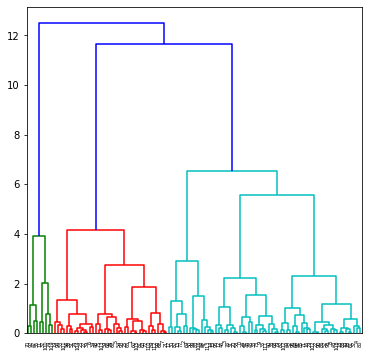

In [50]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(6,6))
dendogram_r=sch.dendrogram(sch.linkage(x_r, method  = "ward"))

It seams like that we can work with 3 clusters

In [51]:
clusters = KMeans(n_clusters=3, random_state=6)
clusters.fit(x_r)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [52]:
r_7_cluster = []
for idx in countrywise.index:
  if countrywise.loc[idx]['Confirmed'] > 1000:
    r_7_cluster.append(clusters.predict(np.asarray(countrywise.loc[idx][['Mortality', 'Recovery']]).reshape(1,-1)))
  else:
    r_7_cluster.append(4)
countrywise['Clusters'] = np.asarray(r_7_cluster, dtype= np.int64)
countrywise

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival porbability,R_7,R_7 Clusters,Clusters
Country,,,,,,,,,,
Afghanistan,14525,249,1303,12973,1.714286,8.970740,98.285714,1.083533,2,0
Albania,1122,33,857,232,2.941176,76.381462,97.058824,1.662500,2,0
Algeria,9267,646,5549,3072,6.970972,59.879141,93.029028,0.874242,2,0
Andorra,764,51,692,21,6.675393,90.575916,93.324607,1.000000,4,4
Angola,84,4,18,62,4.761905,21.428571,95.238095,1.277778,4,4
Antigua and Barbuda,25,3,19,3,12.000000,76.000000,88.000000,NaN,4,4
Argentina,16214,528,4788,10898,3.256445,29.530036,96.743555,1.100023,2,0
Armenia,8927,127,3317,5483,1.422650,37.156940,98.577350,1.111817,2,0
Australia,7192,103,6614,475,1.432147,91.963293,98.567853,1.164179,2,0


In [54]:
summary = pd.concat([countrywise[countrywise['Clusters'] == 0].head(10),countrywise[countrywise['Clusters'] == 1].head(10),countrywise[countrywise['Clusters'] == 2].head(10)])
summary.style.background_gradient(cmap='Blues').format("{:.2f}")

,Confirmed,Death,Recovered,Active,Mortality,Recovery,Survival porbability,R_7,R_7 Clusters,Clusters
Country,,,,,,,,,,
Afghanistan,14525.00,249.00,1303.00,12973.00,1.71,8.97,98.29,1.08,2.00,0.00
Albania,1122.00,33.00,857.00,232.00,2.94,76.38,97.06,1.66,2.00,0.00
Algeria,9267.00,646.00,5549.00,3072.00,6.97,59.88,93.03,0.87,2.00,0.00
Argentina,16214.00,528.00,4788.00,10898.00,3.26,29.53,96.74,1.10,2.00,0.00
Armenia,8927.00,127.00,3317.00,5483.00,1.42,37.16,98.58,1.11,2.00,0.00
Australia,7192.00,103.00,6614.00,475.00,1.43,91.96,98.57,1.16,2.00,0.00
Austria,16685.00,668.00,15520.00,497.00,4.00,93.02,96.00,0.84,2.00,0.00
Azerbaijan,5246.00,61.00,3327.00,1858.00,1.16,63.42,98.84,1.43,1.00,0.00
Bahrain,10793.00,17.00,5826.00,4950.00,0.16,53.98,99.84,1.09,0.00,0.00


In [55]:
print('Average mortality of cluster 0:', countrywise[countrywise['Clusters']==0]['Mortality'].mean())
print('Average recovery of cluster 0:', countrywise[countrywise['Clusters']==0]['Recovery'].mean())
print('Average mortality of cluster 1:', countrywise[countrywise['Clusters']==1]['Mortality'].mean())
print('Average recovery of cluster 1:', countrywise[countrywise['Clusters']==1]['Recovery'].mean())
print('Average mortality of cluster 2:', countrywise[countrywise['Clusters']==2]['Mortality'].mean())
print('Average recovery of cluster 2:', countrywise[countrywise['Clusters']==2]['Recovery'].mean())

Average mortality of cluster 0: 3.4054542232847838
Average recovery of cluster 0: 55.358531168380246
Average mortality of cluster 1: nan
Average recovery of cluster 1: nan
Average mortality of cluster 2: 11.432219870561784
Average recovery of cluster 2: 8.519620708731392


In [56]:
print('Countries that belong to cluster 0: ', countrywise[countrywise['Clusters'] == 0].index)

Countries that belong to cluster 0:  Index(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       ...
       'Thailand', 'Tunisia', 'Turkey', 'USA', 'Ukraine',
       'United Arab Emirates', 'Uzbekistan', 'Venezuela', 'Zambia', 'Global'],
      dtype='object', name='Country', length=109)


In [57]:
print('Countries that belong to cluster 1: ', countrywise[countrywise['Clusters'] == 1].index)

Countries that belong to cluster 1:  Index([], dtype='object', name='Country')


In [58]:
print('Countries that belong to cluster 2: ', countrywise[countrywise['Clusters'] == 2].index)

Countries that belong to cluster 2:  Index(['Belgium', 'Haiti', 'Netherlands', 'Sweden', 'United Kingdom'], dtype='object', name='Country')


In [59]:
clus_mortality ={}
cardinal_positio = {
    '0' : 'the highest recovery',
    '1' : 'a good recovery',
    '2' : 'the lowest recovery'
}

clus_mortality['cluster_0'] = countrywise[countrywise['Clusters'] == 0]['Mortality'].mean()
clus_mortality['cluster_1'] = countrywise[countrywise['Clusters'] == 1]['Mortality'].mean()
clus_mortality['cluster_2'] = countrywise[countrywise['Clusters'] == 2]['Mortality'].mean()

clus_recovery = {}
clus_recovery['cluster_0'] = countrywise[countrywise['Clusters'] == 0]['Recovery'].mean()
clus_recovery['cluster_1'] = countrywise[countrywise['Clusters'] == 1]['Recovery'].mean()
clus_recovery['cluster_2'] = countrywise[countrywise['Clusters'] == 2]['Recovery'].mean()

sort_mortality = sorted(clus_mortality.items(), key=lambda x: x[1], reverse=True)

sort_recovery = sorted(clus_recovery.items(), key=lambda x: x[1], reverse=True)

positions_recovery = [x[0] for x in sort_recovery]
positions_mortality = [x[0] for x in sort_mortality]


print( "\033[1m" + 'The orden below correspond to the position in a descendent order: '+ "\033[0m")
print('----------------------------------------------------------------------------------------------------')
print("The cluster with the highest Mortality value is {} and it has {} rate".format(positions_mortality[0], cardinal_positio[str(positions_recovery.index(positions_mortality[0]))]))

print("The cluster with the middle Mortality value is {} and it has {} rate".format(positions_mortality[1], cardinal_positio[str(positions_recovery.index(positions_mortality[1]))]))

print("The cluster with the Lowest Mortality value is {} and it has {} rate".format(positions_mortality[2], cardinal_positio[str(positions_recovery.index(positions_mortality[2]))]))

The orden below correspond to the position in a descendent order: 
----------------------------------------------------------------------------------------------------
The cluster with the highest Mortality value is cluster_0 and it has the highest recovery rate
The cluster with the middle Mortality value is cluster_1 and it has a good recovery rate
The cluster with the Lowest Mortality value is cluster_2 and it has the lowest recovery rate
